<a href="https://colab.research.google.com/github/CREVIOS/SSI_2020/blob/master/Lecture_4_2_Introduction_to_Machine_Learning_%5BSOLUTION%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Codealong - Linear Regression

## 1. Import the scikit-learn library

Here you can call all the necessary imports for this and the other codealong

In [ ]:
import numpy as np
import pandas as pd
import sklearn 
import sklearn.datasets
import sklearn.linear_model
import sklearn.metrics
import matplotlib.pyplot as plt

## 2. Load Boston housing data

Use the built-in sklearn function `sklearn.datasets.load_boston()` to load in the dataset (originally as a numpy array), convert X to a Pandas DataFrame, and display X.

In [ ]:
X, y = sklearn.datasets.load_boston(return_X_y=True)
X = pd.DataFrame(X)
display(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


## 3. Create and fit a model on the data

Use sklearn's `sklearn.linear_model.LinearRegression()` to create a Linear Regression model, fit it to X and y, and extract the weights. Call the constructer passing in `fit_intercept=False`. Don't worry about what this means yet :)

In [ ]:
model = sklearn.linear_model.LinearRegression(fit_intercept=False)
model.fit(X, y)
w = model.coef_
print(w)

[-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
 -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
  1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
 -4.16304471e-01]


## 4. Predict your labels!

Do this two ways:
*   Manually, by making a function called `predict` that takes an X and returns a predicted y (called yhat) and calling it.
*   With sklearn, by calling the function `predict()` from the model you made.

In both cases, print the first 5 rows of the output.

In [ ]:
def predict(X):
  return np.dot(X, w)

In [ ]:
yhat_manual = predict(X)
print(yhat_manual[:5])

[29.09826353 24.50227548 31.22742641 29.7071035  29.56479572]


In [ ]:
yhat = model.predict(X)
print(yhat[:5])

[29.09826353 24.50227548 31.22742641 29.7071035  29.56479572]


# Codealong - Polynomial Regression

Up here is some code to load in the dataset as a Pandas DataFrame (we need to pull it from github). Make sure to run it before you write any other code. For this codealong we are going to be using a simulated dataset that we constructed to demonstrate Polynomial Regression.

In [ ]:
POLY_DATA_URL = "https://raw.githubusercontent.com/alextsun/ssi-ds-bootcamp-2020/master/Poly_Data.txt"

data = pd.read_csv(POLY_DATA_URL, names=["X", "y"], header=0, sep=" ")

display(data)

,X,y
0,9.647828,2320.482368
1,10.593486,3000.929540
2,10.568243,2981.291116
3,8.479791,1634.571093
4,10.518863,2942.580204
...,...,...
99994,8.391738,1589.220359
99995,10.942225,3281.734852
99996,9.585394,2279.756629
99997,8.869900,1845.545010


## 1. Plot the dataset we provided

Use `matplotlib.pyplot` (add it to the imports at the top and re-run that cell) to plot a scatter plot of the single feature X compared to y.

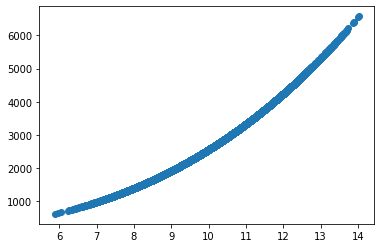

In [ ]:
X = data.loc[:, "X"]
y = data.loc[:, "y"]
X = pd.DataFrame(X)

plt.scatter(X, y)

You'll see that X and y don't seem to have a linear relationship!

## 2. Run a linear regressor again (and see that it has bad accuracy!)

Copy your code from running a linear regression as before, but make sure to NOT set `fit_intercept=False` this time! We want to have a bias term this time (and make sure to print it as well, in addition to the weights!)

In [ ]:
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)
w = model.coef_
b = model.intercept_
print(w)
print(b)

[708.54144174]
-4460.226721171146


Call your model's predict function down here...

In [ ]:
yhat = model.predict(X)

..and then write code to check the RSS!

In [ ]:
np.sum((yhat - y) ** 2)
sklearn.metrics.mean_squared_error(y, yhat)

8483.978302342699

Yikes! That RSS doesn't look great...

## 3. Create two new columns: $X^2$ and $X^3$.

Create a new array called `trans_X` that features three columns ($X^3$, $X^2$, and $X$).

In [ ]:
X2 = X ** 2
X3 = X ** 3

trans_X = np.hstack((X3, X2, X))

## 4. Run linear regression again!

Copy your code from before **once** more to fit your model on trans_X and y. Print the weights and the bias!

In [ ]:
model.fit(trans_X, y)
w = model.coef_
b = model.intercept_
print(w)
print(b)

[2.00030739 4.99065374 3.09319302]
29.695922417102338


The weights should be around [2, 5, 3] and the bias should be about 30!

Finally, predict yhat one final time...

In [ ]:
yhat = model.predict(trans_X)

...and print the RSS!

In [ ]:
((yhat - y) ** 2).sum()
import sklearn.metrics

sklearn.metrics.mean_squared_error(y, yhat)

0.06242462179158131

It should look **much** better!